In [1]:
# Beginning imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import sklearn

In [34]:
# graph decision regions - from the ML with Pytorch and Scikit-Learn Textbook Code
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, test_idx=None,resolution=0.02):
    # setup marker generator and color map
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=f'Class {cl}',
                    edgecolor='black')
    # highlight test examples
    if test_idx:
    # plot all examples
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1],
                    c='none', edgecolor='black', alpha=1.0,
                    linewidth=1, marker='o',
                    s=100, label='Test set')

In [ ]:
# Process data to create linearly separable dataset
df = pd.read_csv("datasets/iris.data",header=None)
setosa = df.iloc[0:50, [0,3,4]].values # get sepal length [column index 0] and 
                                       # petal width [column index 3] of setosa
virginica = df.iloc[100:, [0,3,4]].values # get sepal length [column index 0] 
                                          # and petal width [column index 3] of virginica
combined_set_no_label_conversion = np.concatenate((setosa,virginica))
combined_set_no_label_conversion[combined_set_no_label_conversion[:,2]=="Iris-setosa",2] = 0
combined_set_no_label_conversion[combined_set_no_label_conversion[:,2]=="Iris-virginica",2] = 1
combined_set = combined_set_no_label_conversion
y = combined_set[:,2]
X = combined_set[:,[0,1]]


[[5.1 0.2]
 [4.9 0.2]
 [4.7 0.2]
 [4.6 0.2]
 [5.0 0.2]
 [5.4 0.4]
 [4.6 0.3]
 [5.0 0.2]
 [4.4 0.2]
 [4.9 0.1]
 [5.4 0.2]
 [4.8 0.2]
 [4.8 0.1]
 [4.3 0.1]
 [5.8 0.2]
 [5.7 0.4]
 [5.4 0.4]
 [5.1 0.3]
 [5.7 0.3]
 [5.1 0.3]
 [5.4 0.2]
 [5.1 0.4]
 [4.6 0.2]
 [5.1 0.5]
 [4.8 0.2]
 [5.0 0.2]
 [5.0 0.4]
 [5.2 0.2]
 [5.2 0.2]
 [4.7 0.2]
 [4.8 0.2]
 [5.4 0.4]
 [5.2 0.1]
 [5.5 0.2]
 [4.9 0.1]
 [5.0 0.2]
 [5.5 0.2]
 [4.9 0.1]
 [4.4 0.2]
 [5.1 0.2]
 [5.0 0.3]
 [4.5 0.3]
 [4.4 0.2]
 [5.0 0.6]
 [5.1 0.4]
 [4.8 0.3]
 [5.1 0.2]
 [4.6 0.2]
 [5.3 0.2]
 [5.0 0.2]
 [6.3 2.5]
 [5.8 1.9]
 [7.1 2.1]
 [6.3 1.8]
 [6.5 2.2]
 [7.6 2.1]
 [4.9 1.7]
 [7.3 1.8]
 [6.7 1.8]
 [7.2 2.5]
 [6.5 2.0]
 [6.4 1.9]
 [6.8 2.1]
 [5.7 2.0]
 [5.8 2.4]
 [6.4 2.3]
 [6.5 1.8]
 [7.7 2.2]
 [7.7 2.3]
 [6.0 1.5]
 [6.9 2.3]
 [5.6 2.0]
 [7.7 2.0]
 [6.3 1.8]
 [6.7 2.1]
 [7.2 1.8]
 [6.2 1.8]
 [6.1 1.8]
 [6.4 2.1]
 [7.2 1.6]
 [7.4 1.9]
 [7.9 2.0]
 [6.4 2.2]
 [6.3 1.5]
 [6.1 1.4]
 [7.7 2.3]
 [6.3 2.4]
 [6.4 1.8]
 [6.0 1.8]
 [6.9 2.1]
 [6.7 2.4]

In [30]:
# Break the model into a train and test split, then standardize it (shift the model
# mean to 0, and the model standard deviation to 1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1,stratify=y)
from sklearn.preprocessing import StandardScaler
flower_scaler = StandardScaler()
flower_scaler.fit(X_train)

X_train_std = flower_scaler.transform(X_train)
X_test_std = flower_scaler.transform(X_test)
X_std = flower_scaler.transform(X)

X_train_std = X_train_std.astype(np.int32)
X_test_std = X_test_std.astype(np.int32)
y_train = y_train.astype(np.int32)
y_test = y_test.astype(np.int32)
X = X.astype(np.int32)
y = y.astype(np.int32)

0

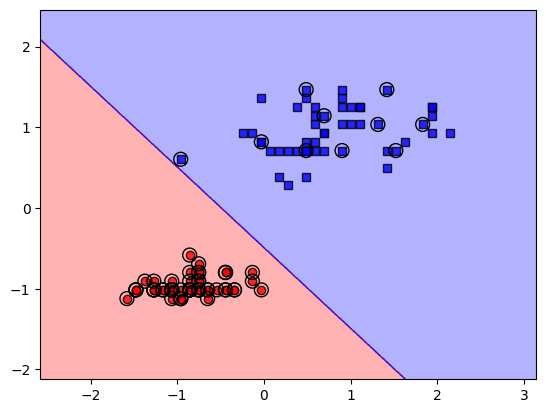

In [50]:
# Fit scitkit-learn SVM to the model
from sklearn.svm import SVC
flower_svm = SVC(kernel="linear",C=1.0,random_state=1)
flower_svm.fit(X_train_std,y_train)

plot_decision_regions(X_std,y,classifier=flower_svm,test_idx=range(0,60))
int(flower_svm.predict([[-2,1]])[0])

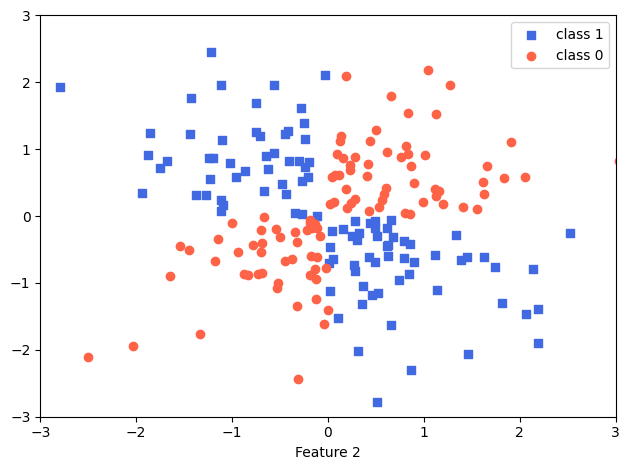

In [ ]:
# Create a nonlinear dataset, to challenge us to use an ML model capable of solving
# said dataset
np.random.seed(1) # set randomness seed for reproducibility
X_xor = np.random.randn(200,2) # create the training inputs
y_xor = np.logical_xor(X_xor[:,0] > 0, X_xor[:,1] > 0) # create the labels to the training inputs
y_xor = np.where(y_xor,1,0)
plt.scatter(X_xor[y_xor == 1, 0],X_xor[y_xor == 1, 1],c='royalblue', marker='s',label="class 1")
plt.scatter(X_xor[y_xor == 0, 0],X_xor[y_xor == 0, 1],c='tomato', marker='o',label="class 0")
plt.xlim([-3,3])
plt.ylim([-3,3])
plt.xlabel("Feature 1")
plt.xlabel("Feature 2")
plt.legend(loc="best")
plt.tight_layout()
plt.show()

# now we have a dataset that is nonlinearly separable